In [ ]:
!pip install emoji
!pip install nltk
!pip install scikit-learn
!pip install xgboost
!pip install transformers
!pip install torch
!pip install datasets
!pip install evaluate

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 590.6/590.6 kB 9.9 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 480.6/480.6 kB 14.2 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 116.3/116.3 kB 9.8 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 179.3/179.3 kB 16.9 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 143.5/143.5 kB 12.7 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 194.8/194.8 kB 17.7 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    F

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import nltk
import re
import emoji
from nltk.tokenize import word_tokenize
nltk.download('punkt_tab')
from nltk.corpus import stopwords
nltk.download('stopwords')

from sklearn.feature_extraction.text import TfidfVectorizer

import torch
from datasets import Dataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
train_data = pd.read_csv('/content/drive/MyDrive/Women Abuse/AWT_train.csv')
validation_data = pd.read_csv('/content/drive/MyDrive/Women Abuse/AWT_dev.csv')
test_data = pd.read_csv('/content/drive/MyDrive/Women Abuse/AWT_test_without_labels.csv')

In [ ]:
train_data.head()

Text        Class
0       ‡Æá‡Æ§‡Æ≤‡Øç‡Æ≤‡ÆÆ‡Øç ‡Æí‡Æ∞‡ØÅ ‡Æ§‡ØÄ‡Æ∞‡Øç‡Æ™‡Øç‡Æ™‡ØÅ ‡Æ®‡Ææ‡Æü‡Øç‡Æü‡Ææ‡ÆÆ‡Øà ‡Æ§‡ØÄ‡Æ∞‡Øç‡Æ™‡Øç‡Æ™‡Øà ‡ÆÆ‡Æ±‡Øç‡Æ±‡ØÅ  Non-Abusive
1           ‡ÆØ‡Ææ‡Æ∞‡ØÅ‡Æü‡Ææ ‡ÆÖ‡Æ®‡Øç‡Æ§ ‡Æï‡Ææ‡Æ∞‡Øç‡Æ§‡Øç‡Æ§‡Æø, ‡Æ®‡ØÄ ‡Æé‡Æô‡Øç‡Æï‡Æü‡Ææ ‡Æá‡Æ∞‡ØÅ‡Æï‡Øç‡Æï ?  Non-Abusive
2  ‡Æá‡Æ∞‡Æ£‡Øç‡Æü‡ØÅ ‡Æ™‡Øá‡Æ∞‡Æø‡Æ©‡Øç (‡Æ™‡ØÅ‡Æ£‡Øç‡Æü‡Øà‡ÆØ‡Øà) ‡Æö‡Ææ‡ÆÆ‡Ææ‡Æ©‡Øç‡Æï‡Æ≥‡Øà ‡Æï‡Øã‡Æ£‡Æø‡ÆØ ‡Æä‡Æö‡Ææ‡Æ≤‡Øç...      Abusive
3  ‡Æé‡Æ©‡Øç‡Æ© ‡Æ§‡Æø‡ÆÆ‡Æø‡Æ∞‡Øç ‡Æá‡Æ®‡Øç‡Æ§ ‡Æ™‡Øä‡Æ£‡Øç‡Æ£‡ØÅ‡Æï‡Øç‡Æï‡ØÅ.....‡ÆÆ‡Æï‡Øç‡Æï‡Æ≥‡Øá ‡Æá‡Æ©‡Øç‡Æ©‡ØÅ‡ÆÆ‡Øç...      Abusive
4          ‡Æê‡ÆØ‡Øã ‡ÆÖ‡Æ®‡Øç‡Æ§ ‡Æï‡Ææ‡Æ∞‡Øç‡Æ§‡Øç‡Æ§‡Æø‡Æï‡Øç ‡Æé ‡Æï‡Ææ‡Æü‡Øç‡Æü‡ØÅ‡Æô‡Øç‡Æï ‡Æ™‡Ææ please  Non-Abusive

In [ ]:
train_data.shape

(2790, 2)

In [ ]:
unique_labels = train_data['Class'].unique()
print(unique_labels)

['Non-Abusive' 'Abusive' 'abusive']


In [ ]:
label_counts = train_data['Class'].value_counts()
print(label_counts)

Class
Non-Abusive    1424
Abusive        1365
abusive           1
Name: count, dtype: int64


In [ ]:
train_data = train_data[train_data['Class'] != 'abusive']

In [ ]:
label_counts = train_data['Class'].value_counts()
print(label_counts)

Class
Non-Abusive    1424
Abusive        1365
Name: count, dtype: int64


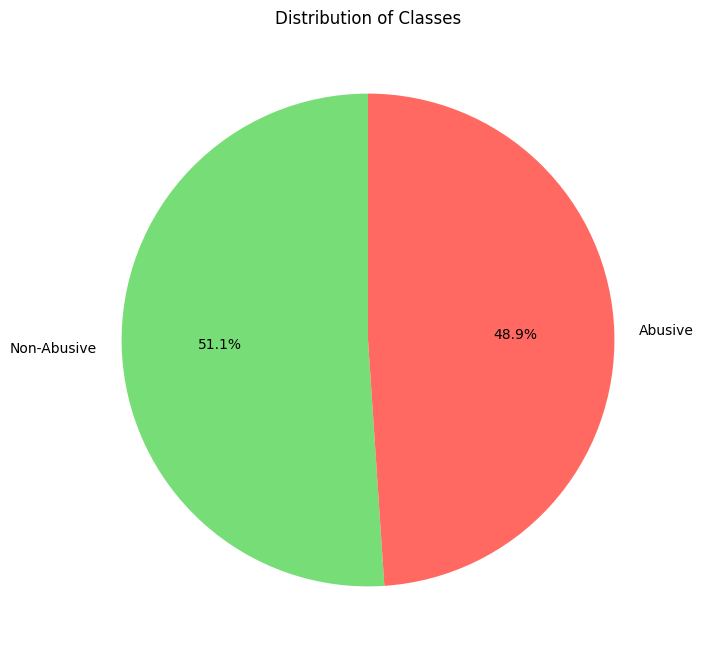

In [ ]:
colors = ['#77DD77', '#FF6961']

fig, ax = plt.subplots(figsize=(8, 8))

ax.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)

ax.set_title('Distribution of Classes')
plt.show()

In [ ]:
stop_word_file_path = '/content/drive/MyDrive/Sentiment Analysis/TamilStopWords.txt'

with open(stop_word_file_path, 'r') as file:
      stop_words_list = [line.strip() for line in file]

print(stop_words_list)

stop_words_list.append(stopwords.words('english'))

print(stop_words_list)

['‡ÆÖ‡Æô‡Øç‡Æï‡ØÅ', '‡ÆÖ‡Æô‡Øç‡Æï‡Øá', '‡ÆÖ‡Æü‡ØÅ‡Æ§‡Øç‡Æ§', '‡ÆÖ‡Æ§‡Æ±‡Øç‡Æï‡ØÅ', '‡ÆÖ‡Æ§‡Æ©‡Ææ‡Æ≤‡Øç', '‡ÆÖ‡Æ§‡Æ©‡Øç', '‡ÆÖ‡Æ§‡Æø‡Æï', '‡ÆÖ‡Æ§‡Æø‡Æ≤‡Øç', '‡ÆÖ‡Æ§‡ØÅ', '‡ÆÖ‡Æ§‡Øá', '‡ÆÖ‡Æ§‡Øà', '‡ÆÖ‡Æ®‡Øç‡Æ§', '‡ÆÖ‡Æ®‡Øç‡Æ§‡Æï‡Øç', '‡ÆÖ‡Æ®‡Øç‡Æ§‡Æ™‡Øç', '‡ÆÖ‡Æ≤‡Øç‡Æ≤‡Æ§‡ØÅ', '‡ÆÖ‡Æµ‡Æ∞‡Æ§‡ØÅ', '‡ÆÖ‡Æµ‡Æ∞‡Øç', '‡ÆÖ‡Æµ‡Æ∞‡Øç‡Æï‡Æ≥‡Øç', '‡ÆÖ‡Æµ‡Æ≥‡Øç', '‡ÆÖ‡Æµ‡Æ©‡Øç', '‡ÆÖ‡Æµ‡Øà', '‡ÆÖ‡Æ©‡Øç‡Æ±‡ØÅ', '‡ÆÜ‡Æï‡Æø‡ÆØ', '‡ÆÜ‡Æï‡Æø‡ÆØ‡Øã‡Æ∞‡Øç', '‡ÆÜ‡Æï‡ØÅ‡ÆÆ‡Øç', '‡ÆÜ‡Æ©‡Ææ‡Æ≤‡Øç', '‡Æá‡Æô‡Øç‡Æï‡ØÅ', '‡Æá‡Æô‡Øç‡Æï‡Øá', '‡Æá‡Æü‡Æ§‡Øç‡Æ§‡Æø‡Æ≤‡Øç', '‡Æá‡Æü‡ÆÆ‡Øç', '‡Æá‡Æ§‡Æ±‡Øç‡Æï‡ØÅ', '‡Æá‡Æ§‡Æ©‡Ææ‡Æ≤‡Øç', '‡Æá‡Æ§‡Æ©‡Øà', '‡Æá‡Æ§‡Æ©‡Øç', '‡Æá‡Æ§‡Æø‡Æ≤‡Øç', '‡Æá‡Æ§‡ØÅ', '‡Æá‡Æ§‡Øà', '‡Æá‡Æ®‡Øç‡Æ§', '‡Æá‡Æ®‡Øç‡Æ§‡Æï‡Øç', '‡Æá‡Æ®‡Øç‡Æ§‡Æ§‡Øç', '‡Æá‡Æ®‡Øç‡Æ§‡Æ™‡Øç', '‡Æá‡Æ™‡Øç‡Æ™‡Øã‡Æ§‡ØÅ', '‡Æá‡Æ∞‡ØÅ', '‡Æá‡Æ∞‡ØÅ‡Æï‡Øç‡Æï‡ØÅ‡ÆÆ‡Øç', '‡Æá‡Æ∞‡ØÅ‡Æ®‡Øç‡Æ§', '‡Æá‡Æ∞‡ØÅ‡Æ®‡Øç‡Æ§‡Æ§‡ØÅ', '‡Æá‡Æ∞‡ØÅ‡Æ®‡Øç‡Æ§‡ØÅ', '‡Æá‡Æ≤‡Øç‡Æ≤‡Øà', '‡Æá‡Æµ‡Æ∞‡Øç', '‡Æá‡Æµ‡Øà', '‡Æá‡Æ©‡Øç‡Æ©‡ØÅ‡ÆÆ‡Øç', '‡Æâ‡Æ≥‡Øç‡Æ≥', '‡

In [ ]:
def clean_tamil_comments(comments):
    clean_comments = []

    for text in comments:

        # Remove URLs
        text = re.sub(r"http\S+|www\S+|https\S+", "", text, flags=re.MULTILINE)

        # Remove email addresses
        text = re.sub(r"\S+@\S+\.\S+", "", text)

        # Remove emojis
        text = emoji.demojize(text, delimiters=(":", ":"))
        text = re.sub(r':\S+?:', '', text)

        # Convert English letters to lowercase while preserving Tamil script
        text = re.sub(
            r"[A-Za-z]+",
            lambda match: match.group(0).lower(),
            text
        )

        # Remove special characters and punctuation (retain Tamil script as text)
        text = re.sub(r"[^\w\s\u0B80-\u0BFF:]+", "", text)

        # Remove numbers
        text = re.sub(r"\d+", "", text)

        # Normalize spaces
        text = re.sub(r"\s+", " ", text).strip()

        clean_comments.append(text)

    return clean_comments

In [ ]:
def tokenize(comments):
    return [word_tokenize(comment) for comment in comments]

In [ ]:
def remove_stop_words(comments):
  for words in comments:
    filtered_words = [word for word in words if word not in stop_words_list]
    words[:] = filtered_words
  return comments

In [ ]:
def preprocess(comments):
  index = random.randint(0, len(comments) - 1)
  print("Original:", comments[index])

  comments = clean_tamil_comments(comments)
  print("Cleaned:", comments[index])

  comments = tokenize(comments)
  print("Tokenised:", comments[index])

  comments = remove_stop_words(comments)
  print("After Stop Words Removal:", comments[index])

  return comments

In [ ]:
train_data['clean_content'] = preprocess(train_data['Text'])

Original: ‡Æö‡Æï‡Æø‡Æ≤‡Ææ ‡ÆÖ‡ÆÆ‡Øç‡ÆÆ‡Ææ ‡Æâ‡Æô‡Øç‡Æï‡Æ≥‡Øç ‡Æ®‡Øá‡Æ∞‡Øç‡Æï‡Ææ‡Æ£‡Æ≤‡Øç ‡ÆÆ‡Æø‡Æï‡Æµ‡ØÅ‡ÆÆ‡Øç ‡Æï‡Æ£‡Øç‡Æ£‡Æø‡ÆØ‡ÆÆ‡Ææ‡Æï ‡Æâ‡Æ≥‡Øç‡Æ≥‡Æ§‡ØÅ.
Cleaned: ‡Æï‡ØÅ‡Æ∑‡Øç‡Æ™‡ØÅ‡Æµ‡Øá ‡Æí‡Æ∞‡ØÅ ‡Æ§‡Ææ‡ÆÆ‡Æ∞‡Øà ‡Æ§‡Ææ‡Æ©‡Øç ‡ÆÖ‡Æµ‡Æ≥‡Øã ‡Æ™‡ØÜ‡Æ∞‡ØÅ‡Æö‡ØÅ ‡Æé‡Æô‡Øç‡Æï ‡Æï‡ØÅ‡Æ∑‡Øç‡Æ™‡ØÇ‡Æµ‡Øã‡Æü ‡Æ§‡Ææ‡ÆÆ‡Æ∞‡Øà
Tokenised: ['‡Æï‡ØÅ‡Æ∑‡Øç‡Æ™‡ØÅ‡Æµ‡Øá', '‡Æí‡Æ∞‡ØÅ', '‡Æ§‡Ææ‡ÆÆ‡Æ∞‡Øà', '‡Æ§‡Ææ‡Æ©‡Øç', '‡ÆÖ‡Æµ‡Æ≥‡Øã', '‡Æ™‡ØÜ‡Æ∞‡ØÅ‡Æö‡ØÅ', '‡Æé‡Æô‡Øç‡Æï', '‡Æï‡ØÅ‡Æ∑‡Øç‡Æ™‡ØÇ‡Æµ‡Øã‡Æü', '‡Æ§‡Ææ‡ÆÆ‡Æ∞‡Øà']
After Stop Words Removal: ['‡Æï‡ØÅ‡Æ∑‡Øç‡Æ™‡ØÅ‡Æµ‡Øá', '‡Æ§‡Ææ‡ÆÆ‡Æ∞‡Øà', '‡ÆÖ‡Æµ‡Æ≥‡Øã', '‡Æ™‡ØÜ‡Æ∞‡ØÅ‡Æö‡ØÅ', '‡Æé‡Æô‡Øç‡Æï', '‡Æï‡ØÅ‡Æ∑‡Øç‡Æ™‡ØÇ‡Æµ‡Øã‡Æü', '‡Æ§‡Ææ‡ÆÆ‡Æ∞‡Øà']


In [ ]:
validation_data['clean_content'] = preprocess(validation_data['Text'])

Original: ‡Æï‡ØÅ‡Æ¥‡Æ®‡Øç‡Æ§‡Øà ‡ÆØ‡Æø‡Æ≤‡Øç ‡Æú‡Æü‡Øç‡Æü‡Æø ‡ÆØ‡ØÅ‡Æü‡Æ©‡Øç ‡ÆÜ‡Æü‡Æø‡Æ©  ‡Æá‡Æ™‡Øç‡Æ™ ‡Æú‡Æü‡Øç‡Æü‡Æø ‡Æá‡Æ≤‡Øç‡Æ≤‡Ææ‡ÆÆ‡Æ≤‡Øç ‡ÆÖ‡Æü‡Æø‡Æï‡Æø‡Æü‡Øç‡Æü‡ØÅ ‡Æá‡Æ∞‡ØÅ‡Æï‡Øç‡Æï‡Ææ
Cleaned: ‡Æï‡ØÅ‡Æ¥‡Æ®‡Øç‡Æ§‡Øà ‡ÆØ‡Æø‡Æ≤‡Øç ‡Æú‡Æü‡Øç‡Æü‡Æø ‡ÆØ‡ØÅ‡Æü‡Æ©‡Øç ‡ÆÜ‡Æü‡Æø‡Æ© ‡Æá‡Æ™‡Øç‡Æ™ ‡Æú‡Æü‡Øç‡Æü‡Æø ‡Æá‡Æ≤‡Øç‡Æ≤‡Ææ‡ÆÆ‡Æ≤‡Øç ‡ÆÖ‡Æü‡Æø‡Æï‡Æø‡Æü‡Øç‡Æü‡ØÅ ‡Æá‡Æ∞‡ØÅ‡Æï‡Øç‡Æï‡Ææ
Tokenised: ['‡Æï‡ØÅ‡Æ¥‡Æ®‡Øç‡Æ§‡Øà', '‡ÆØ‡Æø‡Æ≤‡Øç', '‡Æú‡Æü‡Øç‡Æü‡Æø', '‡ÆØ‡ØÅ‡Æü‡Æ©‡Øç', '‡ÆÜ‡Æü‡Æø‡Æ©', '‡Æá‡Æ™‡Øç‡Æ™', '‡Æú‡Æü‡Øç‡Æü‡Æø', '‡Æá‡Æ≤‡Øç‡Æ≤‡Ææ‡ÆÆ‡Æ≤‡Øç', '‡ÆÖ‡Æü‡Æø‡Æï‡Æø‡Æü‡Øç‡Æü‡ØÅ', '‡Æá‡Æ∞‡ØÅ‡Æï‡Øç‡Æï‡Ææ']
After Stop Words Removal: ['‡Æï‡ØÅ‡Æ¥‡Æ®‡Øç‡Æ§‡Øà', '‡ÆØ‡Æø‡Æ≤‡Øç', '‡Æú‡Æü‡Øç‡Æü‡Æø', '‡ÆØ‡ØÅ‡Æü‡Æ©‡Øç', '‡ÆÜ‡Æü‡Æø‡Æ©', '‡Æá‡Æ™‡Øç‡Æ™', '‡Æú‡Æü‡Øç‡Æü‡Æø', '‡Æá‡Æ≤‡Øç‡Æ≤‡Ææ‡ÆÆ‡Æ≤‡Øç', '‡ÆÖ‡Æü‡Æø‡Æï‡Æø‡Æü‡Øç‡Æü‡ØÅ', '‡Æá‡Æ∞‡ØÅ‡Æï‡Øç‡Æï‡Ææ']


In [ ]:
train_data.head()

Text        Class  \
0       ‡Æá‡Æ§‡Æ≤‡Øç‡Æ≤‡ÆÆ‡Øç ‡Æí‡Æ∞‡ØÅ ‡Æ§‡ØÄ‡Æ∞‡Øç‡Æ™‡Øç‡Æ™‡ØÅ ‡Æ®‡Ææ‡Æü‡Øç‡Æü‡Ææ‡ÆÆ‡Øà ‡Æ§‡ØÄ‡Æ∞‡Øç‡Æ™‡Øç‡Æ™‡Øà ‡ÆÆ‡Æ±‡Øç‡Æ±‡ØÅ  Non-Abusive   
1           ‡ÆØ‡Ææ‡Æ∞‡ØÅ‡Æü‡Ææ ‡ÆÖ‡Æ®‡Øç‡Æ§ ‡Æï‡Ææ‡Æ∞‡Øç‡Æ§‡Øç‡Æ§‡Æø, ‡Æ®‡ØÄ ‡Æé‡Æô‡Øç‡Æï‡Æü‡Ææ ‡Æá‡Æ∞‡ØÅ‡Æï‡Øç‡Æï ?  Non-Abusive   
2  ‡Æá‡Æ∞‡Æ£‡Øç‡Æü‡ØÅ ‡Æ™‡Øá‡Æ∞‡Æø‡Æ©‡Øç (‡Æ™‡ØÅ‡Æ£‡Øç‡Æü‡Øà‡ÆØ‡Øà) ‡Æö‡Ææ‡ÆÆ‡Ææ‡Æ©‡Øç‡Æï‡Æ≥‡Øà ‡Æï‡Øã‡Æ£‡Æø‡ÆØ ‡Æä‡Æö‡Ææ‡Æ≤‡Øç...      Abusive   
3  ‡Æé‡Æ©‡Øç‡Æ© ‡Æ§‡Æø‡ÆÆ‡Æø‡Æ∞‡Øç ‡Æá‡Æ®‡Øç‡Æ§ ‡Æ™‡Øä‡Æ£‡Øç‡Æ£‡ØÅ‡Æï‡Øç‡Æï‡ØÅ.....‡ÆÆ‡Æï‡Øç‡Æï‡Æ≥‡Øá ‡Æá‡Æ©‡Øç‡Æ©‡ØÅ‡ÆÆ‡Øç...      Abusive   
4          ‡Æê‡ÆØ‡Øã ‡ÆÖ‡Æ®‡Øç‡Æ§ ‡Æï‡Ææ‡Æ∞‡Øç‡Æ§‡Øç‡Æ§‡Æø‡Æï‡Øç ‡Æé ‡Æï‡Ææ‡Æü‡Øç‡Æü‡ØÅ‡Æô‡Øç‡Æï ‡Æ™‡Ææ please  Non-Abusive   

                                       clean_content  
0     [‡Æá‡Æ§‡Æ≤‡Øç‡Æ≤‡ÆÆ‡Øç, ‡Æ§‡ØÄ‡Æ∞‡Øç‡Æ™‡Øç‡Æ™‡ØÅ, ‡Æ®‡Ææ‡Æü‡Øç‡Æü‡Ææ‡ÆÆ‡Øà, ‡Æ§‡ØÄ‡Æ∞‡Øç‡Æ™‡Øç‡Æ™‡Øà, ‡ÆÆ‡Æ±‡Øç‡Æ±‡ØÅ]  
1                 [‡ÆØ‡Ææ‡Æ∞‡ØÅ‡Æü‡Ææ, ‡Æï‡Ææ‡Æ∞‡Øç‡Æ§‡Øç‡Æ§‡Æø, ‡Æé‡Æô‡Øç‡Æï‡Æü‡Ææ, ‡Æá‡Æ∞‡ØÅ‡Æï‡Øç‡Æï]  
2  [‡Æá‡Æ∞‡Æ£‡Øç‡Æü‡ØÅ, ‡Æ™‡Øá‡Æ∞‡Æø‡Æ©‡Øç, ‡Æ™‡ØÅ‡Æ£‡Øç‡Æü‡Øà‡ÆØ‡Øà, ‡Æö‡Ææ‡ÆÆ‡Ææ‡Æ©‡Øç‡Æï‡Æ≥‡Øà, ‡Æï‡Øã‡Æ£‡Æø‡ÆØ, ‡Æä...  
3  [‡Æ§‡Æø‡ÆÆ‡Æø‡Æ∞‡Øç, ‡Æ™‡Øä‡Æ£‡Øç‡Æ£‡ØÅ‡Æï‡Øç‡Æï‡ØÅ‡ÆÆ‡Æï‡Øç‡Æï‡Æ≥‡Øá, ‡Æá‡Æµ‡Æ≥‡ØÅ‡Æü‡Øà‡ÆØ, ‡Æµ‡ØÄ‡Æü‡Æø‡ÆØ‡Øã‡Æï‡Øç‡Æï‡Æ≥...  
4        [‡Æê‡ÆØ‡Øã, ‡Æï‡Ææ‡Æ∞‡Øç‡Æ§‡Øç‡Æ§‡Æø‡Æï‡Øç, ‡Æé, ‡Æï‡Ææ‡Æü‡Øç‡Æü‡ØÅ‡Æô‡Øç‡Æï, ‡Æ™‡Ææ, please]

In [ ]:
label_mapping = {label: idx for idx, label in enumerate(train_data['Class'].unique())}
train_data['numerical_labels'] = train_data['Class'].map(label_mapping)
validation_data['numerical_labels'] = validation_data['Class'].map(label_mapping)

In [ ]:
train_data.head()

Text        Class  \
0       ‡Æá‡Æ§‡Æ≤‡Øç‡Æ≤‡ÆÆ‡Øç ‡Æí‡Æ∞‡ØÅ ‡Æ§‡ØÄ‡Æ∞‡Øç‡Æ™‡Øç‡Æ™‡ØÅ ‡Æ®‡Ææ‡Æü‡Øç‡Æü‡Ææ‡ÆÆ‡Øà ‡Æ§‡ØÄ‡Æ∞‡Øç‡Æ™‡Øç‡Æ™‡Øà ‡ÆÆ‡Æ±‡Øç‡Æ±‡ØÅ  Non-Abusive   
1           ‡ÆØ‡Ææ‡Æ∞‡ØÅ‡Æü‡Ææ ‡ÆÖ‡Æ®‡Øç‡Æ§ ‡Æï‡Ææ‡Æ∞‡Øç‡Æ§‡Øç‡Æ§‡Æø, ‡Æ®‡ØÄ ‡Æé‡Æô‡Øç‡Æï‡Æü‡Ææ ‡Æá‡Æ∞‡ØÅ‡Æï‡Øç‡Æï ?  Non-Abusive   
2  ‡Æá‡Æ∞‡Æ£‡Øç‡Æü‡ØÅ ‡Æ™‡Øá‡Æ∞‡Æø‡Æ©‡Øç (‡Æ™‡ØÅ‡Æ£‡Øç‡Æü‡Øà‡ÆØ‡Øà) ‡Æö‡Ææ‡ÆÆ‡Ææ‡Æ©‡Øç‡Æï‡Æ≥‡Øà ‡Æï‡Øã‡Æ£‡Æø‡ÆØ ‡Æä‡Æö‡Ææ‡Æ≤‡Øç...      Abusive   
3  ‡Æé‡Æ©‡Øç‡Æ© ‡Æ§‡Æø‡ÆÆ‡Æø‡Æ∞‡Øç ‡Æá‡Æ®‡Øç‡Æ§ ‡Æ™‡Øä‡Æ£‡Øç‡Æ£‡ØÅ‡Æï‡Øç‡Æï‡ØÅ.....‡ÆÆ‡Æï‡Øç‡Æï‡Æ≥‡Øá ‡Æá‡Æ©‡Øç‡Æ©‡ØÅ‡ÆÆ‡Øç...      Abusive   
4          ‡Æê‡ÆØ‡Øã ‡ÆÖ‡Æ®‡Øç‡Æ§ ‡Æï‡Ææ‡Æ∞‡Øç‡Æ§‡Øç‡Æ§‡Æø‡Æï‡Øç ‡Æé ‡Æï‡Ææ‡Æü‡Øç‡Æü‡ØÅ‡Æô‡Øç‡Æï ‡Æ™‡Ææ please  Non-Abusive   

                                       clean_content  numerical_labels  
0     [‡Æá‡Æ§‡Æ≤‡Øç‡Æ≤‡ÆÆ‡Øç, ‡Æ§‡ØÄ‡Æ∞‡Øç‡Æ™‡Øç‡Æ™‡ØÅ, ‡Æ®‡Ææ‡Æü‡Øç‡Æü‡Ææ‡ÆÆ‡Øà, ‡Æ§‡ØÄ‡Æ∞‡Øç‡Æ™‡Øç‡Æ™‡Øà, ‡ÆÆ‡Æ±‡Øç‡Æ±‡ØÅ]                 0  
1                 [‡ÆØ‡Ææ‡Æ∞‡ØÅ‡Æü‡Ææ, ‡Æï‡Ææ‡Æ∞‡Øç‡Æ§‡Øç‡Æ§‡Æø, ‡Æé‡Æô‡Øç‡Æï‡Æü‡Ææ, ‡Æá‡Æ∞‡ØÅ‡Æï‡Øç‡Æï]                 0  
2  [‡Æá‡Æ∞‡Æ£‡Øç‡Æü‡ØÅ, ‡Æ™‡Øá‡Æ∞‡Æø‡Æ©‡Øç, ‡Æ™‡ØÅ‡Æ£‡Øç‡Æü‡Øà‡ÆØ‡Øà, ‡Æö‡Ææ‡ÆÆ‡Ææ‡Æ©‡Øç‡Æï‡Æ≥‡Øà, ‡Æï‡Øã‡Æ£‡Æø‡ÆØ, ‡Æä...                 1  
3  [‡Æ§‡Æø‡ÆÆ‡Æø‡Æ∞‡Øç, ‡Æ™‡Øä‡Æ£‡Øç‡Æ£‡ØÅ‡Æï‡Øç‡Æï‡ØÅ‡ÆÆ‡Æï‡Øç‡Æï‡Æ≥‡Øá, ‡Æá‡Æµ‡Æ≥‡ØÅ‡Æü‡Øà‡ÆØ, ‡Æµ‡ØÄ‡Æü‡Æø‡ÆØ‡Øã‡Æï‡Øç‡Æï‡Æ≥...                 1  
4        [‡Æê‡ÆØ‡Øã, ‡Æï‡Ææ‡Æ∞‡Øç‡Æ§‡Øç‡Æ§‡Æø‡Æï‡Øç, ‡Æé, ‡Æï‡Ææ‡Æü‡Øç‡Æü‡ØÅ‡Æô‡Øç‡Æï, ‡Æ™‡Ææ, please]                 0

In [ ]:
X_train = [' '.join(comment) for comment in train_data['clean_content']]
y_train = train_data['numerical_labels']

In [ ]:
X_val = [' '.join(comment) for comment in validation_data['clean_content']]
y_val = validation_data['numerical_labels']

In [ ]:
print(set(y_train))
print(set(y_val))

{0, 1}
{0, 1}


In [ ]:
# Step 1: Load the tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("google/muril-base-cased")
model = AutoModelForSequenceClassification.from_pretrained("google/muril-base-cased", num_labels=2)

# Step 2: Preprocess the dataset
def preprocess_function(examples):
    return tokenizer(examples["text"], truncation=True, padding="max_length", max_length=128)

# Convert your data into Hugging Face Dataset format
train_data = Dataset.from_dict({"text": X_train, "label": y_train})
val_data = Dataset.from_dict({"text": X_val, "label": y_val})

# Tokenize the datasets
train_data = train_data.map(preprocess_function, batched=True)
val_data = val_data.map(preprocess_function, batched=True)

# Set format for PyTorch
train_data.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])
val_data.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])

# Step 3: Define the metrics
def compute_metrics(pred):
    predictions = np.argmax(pred.predictions, axis=1)
    accuracy = accuracy_score(pred.label_ids, predictions)
    f1 = f1_score(pred.label_ids, predictions)
    precision = precision_score(pred.label_ids, predictions)
    recall = recall_score(pred.label_ids, predictions)
    return {"accuracy": accuracy, "f1": f1, "precision": precision, "recall": recall}

# Step 4: Training Arguments
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=5,
    weight_decay=0.01,
    save_strategy="epoch",
    save_total_limit=2,
    logging_dir="./logs",
    logging_steps=10,
    load_best_model_at_end=True,
    metric_for_best_model="f1",
    seed=42,
    report_to="none",
)

# Step 5: Define the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_data,
    eval_dataset=val_data,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

# Step 6: Train the model
trainer.train()

# Step 7: Evaluate the model
results = trainer.evaluate()
print("Final Evaluation Results:", results)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/206 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/411 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/3.16M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/113 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/953M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at google/muril-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/2789 [00:00<?, ? examples/s]

Map:   0%|          | 0/598 [00:00<?, ? examples/s]

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-25-6227129f1458>:50: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Final Evaluation Results: {'eval_loss': 0.5209535956382751, 'eval_accuracy': 0.7775919732441472, 'eval_f1': 0.7764705882352941, 'eval_precision': 0.7287066246056783, 'eval_recall': 0.8309352517985612, 'eval_runtime': 4.1355, 'eval_samples_per_second': 144.6, 'eval_steps_per_second': 9.189, 'epoch': 5.0}


In [ ]:
# Save the model and tokenizer
model.save_pretrained("/content/drive/MyDrive/Women Abuse/saved_model")
tokenizer.save_pretrained("/content/drive/MyDrive/Women Abuse/saved_model")

('/content/drive/MyDrive/Women Abuse/saved_model/tokenizer_config.json',
 '/content/drive/MyDrive/Women Abuse/saved_model/special_tokens_map.json',
 '/content/drive/MyDrive/Women Abuse/saved_model/vocab.txt',
 '/content/drive/MyDrive/Women Abuse/saved_model/added_tokens.json',
 '/content/drive/MyDrive/Women Abuse/saved_model/tokenizer.json')

In [ ]:
# Load the saved model and tokenizer
model = AutoModelForSequenceClassification.from_pretrained("/content/drive/MyDrive/Women Abuse/saved_model")
tokenizer = AutoTokenizer.from_pretrained("/content/drive/MyDrive/Women Abuse/saved_model")

# Prepare new data
new_texts = ["‡Æá‡Æµ ‡Æí‡Æ∞‡ØÅ ‡ÆÆ‡Ææ‡Æ©‡ØÜ‡Æô‡Øç‡Æï‡ØÜ‡Æü‡Øç‡Æü ‡Æ™‡Øä‡Æ±‡ØÅ‡Æï‡Øç‡Æï‡Æø. ‡Æí‡Æ∞‡Øá ‡Æí‡Æ∞‡ØÅ routine ‡Æí‡Æ∞‡Øç‡Æï‡Øç ‡ÆÖ‡Æµ‡Æ≥‡ØÅ‡Æï‡Øç‡Æï‡ØÅ ‡Æá‡Æ∞‡ØÅ‡Æï‡Øç‡Æï‡ØÅ‡Æ±‡Æ§‡ØÅ ‡Æ§‡Æ£‡Øç‡Æ£‡Æø‡ÆØ ‡Æ™‡Øã‡Æü‡Øç‡Æü‡ØÅ‡Æü‡Øç‡Æü‡ØÅ ‡ÆÖ‡Æö‡Æø‡Æô‡Øç‡Æï‡ÆÆ‡Ææ ‡Æ™‡Øá‡Æö‡ØÅ‡Æ±‡Æ§‡ØÅ.", "‡Æ®‡Ææ‡Æü‡Øç‡Æü‡ØÅ‡Æï‡Øç‡Æï‡ØÅ‡ÆÆ‡Øç ‡Æµ‡ØÄ‡Æü‡Øç‡Æü‡ØÅ‡Æï‡Øç‡Æï‡ØÅ‡ÆÆ‡Øç ‡Æ∞‡Øä‡ÆÆ‡Øç‡Æ™ ‡ÆÆ‡ØÅ‡Æï‡Øç‡Æï‡Æø‡ÆØ‡ÆÆ‡Øç ‡Æé‡Æ©‡Øç‡Æ© ‡Æ™‡Øä‡ÆØ‡Øç‡ÆØ‡Æü‡Ææ ‡Æö‡Ææ‡ÆÆ‡Æø"]
encoded_inputs = tokenizer(new_texts, truncation=True, padding="max_length", max_length=128, return_tensors="pt")

# Move model and data to device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
encoded_inputs = {key: val.to(device) for key, val in encoded_inputs.items()}

# Predict
with torch.no_grad():
    outputs = model(**encoded_inputs)
    logits = outputs.logits
    predictions = torch.argmax(logits, axis=1)

print("Predicted Labels:", predictions.cpu().numpy())

Predicted Labels: [1 0]


In [ ]:
test_data.head()

id                                               Text
0   1  ‡Æá‡Æµ ‡Æí‡Æ∞‡ØÅ ‡ÆÆ‡Ææ‡Æ©‡ØÜ‡Æô‡Øç‡Æï‡ØÜ‡Æü‡Øç‡Æü ‡Æ™‡Øä‡Æ±‡ØÅ‡Æï‡Øç‡Æï‡Æø. ‡Æí‡Æ∞‡Øá ‡Æí‡Æ∞‡ØÅ routine ‡Æí...
1   2  ‡Æá‡Æ™‡Øç‡Æü‡Æø‡ÆØ‡Øá ‡Æ™‡Øá‡Æö‡Æø‡Æï‡Øç‡Æï‡Æø‡Æü‡Øç‡Æü‡Øá ‡Æá‡Æ∞‡ØÅ‡Æ®‡Øç‡Æ§‡Ææ ‡Æé‡Æ™‡Øç‡Æü‡Æø..... ‡ÆØ‡Ææ‡Æ∞‡ØÅ ‡Æ™...
2   3  ‡ÆÖ‡Æü‡Æï‡Øç ‡Æï‡Æü‡Æµ‡ØÅ‡Æ≥‡Øá ‡Æá‡Æ§‡ØÅ ‡Æé‡Æ©‡Øç‡Æ©‡Æï‡Øç ‡Æï‡Øä‡Æü‡ØÅ‡ÆÆ‡Øà‡ÆØ‡Øà ‡Æä‡Æ∞‡ØÅ‡Æ≤ ‡Æâ‡Æ≤‡Æï‡Æ§‡Øç‡Æ§‡ØÅ‡Æ≤ ...
3   4  ‡Æá‡Æ§‡Æ±‡Øç‡Æï‡ØÅ ‡Æí‡Æ∞‡ØÅ ‡Æ§‡ØÄ‡Æ∞‡Øç‡Æµ‡ØÅ ‡Æá‡Æ∞‡ØÅ‡Æï‡Øç‡Æï‡ØÅ.  ‡ÆÖ‡Æµ‡Æ©‡Øç ‡ÆÖ‡Æµ‡Æ©‡Øç ‡Æµ‡Øá‡Æ≤‡Øà ‡ÆÖ‡Æµ‡Æ©...
4   5  ‡Æ§‡ÆÆ‡Øç‡Æ™‡Æø ‡Æ™‡Øã‡ÆØ‡Øç ‡Æ®‡Æ≤‡Øç‡Æ≤‡Æµ‡Æô‡Øç‡Æï‡Æ≥‡Øà ‡Æ™‡Øá‡Æü‡Øç‡Æü‡Æø‡Æé‡Æü‡ØÅ ‡ÆÖ‡Æµ ‡Æö‡Øä‡Æ≤‡Øç‡Æµ‡Æ§‡ØÅ ‡ÆÖ‡Æ§‡Øç...

In [ ]:
test_data['clean_content'] = preprocess(test_data['Text'])
X_test = [' '.join(comment) for comment in test_data['clean_content']]

Original: ‡ÆÖ‡Æ¥‡Æï‡Æø ‡Æ™‡Øã‡Æü‡Øç‡Æü‡Æø ‡Æá‡Æ≤‡Øç‡Æ≤‡Øà. ‡Æï‡Æø‡Æ¥‡Æµ‡Æø ‡Æ™‡Øã‡Æü‡Øç‡Æü‡Æø‡ÆØ‡Æø‡Æ≤‡Øç ‡Æ®‡ØÄ ‡Æµ‡ØÜ‡Æ©‡Øç‡Æ±‡Ææ‡ÆØ‡Øç..
Cleaned: ‡ÆÖ‡Æ¥‡Æï‡Æø ‡Æ™‡Øã‡Æü‡Øç‡Æü‡Æø ‡Æá‡Æ≤‡Øç‡Æ≤‡Øà ‡Æï‡Æø‡Æ¥‡Æµ‡Æø ‡Æ™‡Øã‡Æü‡Øç‡Æü‡Æø‡ÆØ‡Æø‡Æ≤‡Øç ‡Æ®‡ØÄ ‡Æµ‡ØÜ‡Æ©‡Øç‡Æ±‡Ææ‡ÆØ‡Øç
Tokenised: ['‡ÆÖ‡Æ¥‡Æï‡Æø', '‡Æ™‡Øã‡Æü‡Øç‡Æü‡Æø', '‡Æá‡Æ≤‡Øç‡Æ≤‡Øà', '‡Æï‡Æø‡Æ¥‡Æµ‡Æø', '‡Æ™‡Øã‡Æü‡Øç‡Æü‡Æø‡ÆØ‡Æø‡Æ≤‡Øç', '‡Æ®‡ØÄ', '‡Æµ‡ØÜ‡Æ©‡Øç‡Æ±‡Ææ‡ÆØ‡Øç']
After Stop Words Removal: ['‡ÆÖ‡Æ¥‡Æï‡Æø', '‡Æ™‡Øã‡Æü‡Øç‡Æü‡Æø', '‡Æï‡Æø‡Æ¥‡Æµ‡Æø', '‡Æ™‡Øã‡Æü‡Øç‡Æü‡Æø‡ÆØ‡Æø‡Æ≤‡Øç', '‡Æµ‡ØÜ‡Æ©‡Øç‡Æ±‡Ææ‡ÆØ‡Øç']


In [ ]:
encoded_inputs = tokenizer(X_test, truncation=True, padding="max_length", max_length=128, return_tensors="pt")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
encoded_inputs = {key: val.to(device) for key, val in encoded_inputs.items()}

# Predict
with torch.no_grad():
    outputs = model(**encoded_inputs)
    logits = outputs.logits
    predictions = torch.argmax(logits, axis=1)

print("Predicted Labels:\n", predictions.cpu().numpy())

Predicted Labels:
 [1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 0 0 0 1 0 1 1 1 1 1 0 1 1 1 0 1 0 0 1 0 0 0
 1 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 0 1 1 1 1 0 1 1 0 0 1 0 0 0
 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 0 1 0 1 1 1 1 1 0 1 0 1 1 0 1 1 1
 1 0 0 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 0 0 1 0 0 1 0 1 1
 0 0 1 0 1 1 0 1 1 1 1 1 0 0 0 0 0 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 0 1 1 1
 0 1 0 0 0 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1 1 0 0 0 0 1 0 1 1 0 0 0 1 0 1 1 0
 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0
 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 1 1 0 1 0 1 1
 0 0 1 1 1 0 1 0 0 1 0 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 1 1 0 0 1 0 0 1 1
 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1 0 0 1 1 0 1 0 1 0 0 1 1 1 0 0 1 1 1 1 1 1 1
 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 0 0 1 0 0 0 0 1 0 1
 1 1 1 1 1 1 1 0 0 1 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 0 1 0 1 0 1 1 1 1 1
 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 1 1 1 0 1 0 1 1 1 0 0
 1 0 1

In [ ]:
mapping = {0: 'Non-Abusive', 1: 'Abusive'}
test_data['Predicted Class'] = predictions.cpu().numpy()
test_data['Predicted Class'] = test_data['Predicted Class'].map(mapping)

In [ ]:
test_data.head()

id                                               Text  \
0   1  ‡Æá‡Æµ ‡Æí‡Æ∞‡ØÅ ‡ÆÆ‡Ææ‡Æ©‡ØÜ‡Æô‡Øç‡Æï‡ØÜ‡Æü‡Øç‡Æü ‡Æ™‡Øä‡Æ±‡ØÅ‡Æï‡Øç‡Æï‡Æø. ‡Æí‡Æ∞‡Øá ‡Æí‡Æ∞‡ØÅ routine ‡Æí...   
1   2  ‡Æá‡Æ™‡Øç‡Æü‡Æø‡ÆØ‡Øá ‡Æ™‡Øá‡Æö‡Æø‡Æï‡Øç‡Æï‡Æø‡Æü‡Øç‡Æü‡Øá ‡Æá‡Æ∞‡ØÅ‡Æ®‡Øç‡Æ§‡Ææ ‡Æé‡Æ™‡Øç‡Æü‡Æø..... ‡ÆØ‡Ææ‡Æ∞‡ØÅ ‡Æ™...   
2   3  ‡ÆÖ‡Æü‡Æï‡Øç ‡Æï‡Æü‡Æµ‡ØÅ‡Æ≥‡Øá ‡Æá‡Æ§‡ØÅ ‡Æé‡Æ©‡Øç‡Æ©‡Æï‡Øç ‡Æï‡Øä‡Æü‡ØÅ‡ÆÆ‡Øà‡ÆØ‡Øà ‡Æä‡Æ∞‡ØÅ‡Æ≤ ‡Æâ‡Æ≤‡Æï‡Æ§‡Øç‡Æ§‡ØÅ‡Æ≤ ...   
3   4  ‡Æá‡Æ§‡Æ±‡Øç‡Æï‡ØÅ ‡Æí‡Æ∞‡ØÅ ‡Æ§‡ØÄ‡Æ∞‡Øç‡Æµ‡ØÅ ‡Æá‡Æ∞‡ØÅ‡Æï‡Øç‡Æï‡ØÅ.  ‡ÆÖ‡Æµ‡Æ©‡Øç ‡ÆÖ‡Æµ‡Æ©‡Øç ‡Æµ‡Øá‡Æ≤‡Øà ‡ÆÖ‡Æµ‡Æ©...   
4   5  ‡Æ§‡ÆÆ‡Øç‡Æ™‡Æø ‡Æ™‡Øã‡ÆØ‡Øç ‡Æ®‡Æ≤‡Øç‡Æ≤‡Æµ‡Æô‡Øç‡Æï‡Æ≥‡Øà ‡Æ™‡Øá‡Æü‡Øç‡Æü‡Æø‡Æé‡Æü‡ØÅ ‡ÆÖ‡Æµ ‡Æö‡Øä‡Æ≤‡Øç‡Æµ‡Æ§‡ØÅ ‡ÆÖ‡Æ§‡Øç...   

                                       clean_content Predicted Class  
0  [‡Æá‡Æµ, ‡ÆÆ‡Ææ‡Æ©‡ØÜ‡Æô‡Øç‡Æï‡ØÜ‡Æü‡Øç‡Æü, ‡Æ™‡Øä‡Æ±‡ØÅ‡Æï‡Øç‡Æï‡Æø, routine, ‡Æí‡Æ∞‡Øç‡Æï‡Øç, ‡ÆÖ‡Æµ...         Abusive  
1  [‡Æá‡Æ™‡Øç‡Æü‡Æø‡ÆØ‡Øá, ‡Æ™‡Øá‡Æö‡Æø‡Æï‡Øç‡Æï‡Æø‡Æü‡Øç‡Æü‡Øá, ‡Æá‡Æ∞‡ØÅ‡Æ®‡Øç‡Æ§‡Ææ, ‡Æé‡Æ™‡Øç‡Æü‡Æø, ‡ÆØ‡Ææ‡Æ∞‡ØÅ, ...         Abusive  
2  [‡ÆÖ‡Æü‡Æï‡Øç, ‡Æï‡Æü‡Æµ‡ØÅ‡Æ≥‡Øá, ‡Æé‡Æ©‡Øç‡Æ©‡Æï‡Øç, ‡Æï‡Øä‡Æü‡ØÅ‡ÆÆ‡Øà‡ÆØ‡Øà, ‡Æä‡Æ∞‡ØÅ‡Æ≤, ‡Æâ‡Æ≤‡Æï‡Æ§‡Øç‡Æ§‡ØÅ...     Non-Abusive  
3  [‡Æ§‡ØÄ‡Æ∞‡Øç‡Æµ‡ØÅ, ‡Æá‡Æ∞‡ØÅ‡Æï‡Øç‡Æï‡ØÅ, ‡Æµ‡Øá‡Æ≤‡Øà, ‡Æ™‡Ææ‡Æ∞‡Øç‡Æ§‡Øç‡Æ§‡Ææ‡Æ≤‡Øç, ‡Æ™‡Ææ‡Æ§‡Æø‡Æ™‡Øç‡Æ™‡ØÅ‡ÆÆ‡Øç...     Non-Abusive  
4  [‡Æ§‡ÆÆ‡Øç‡Æ™‡Æø, ‡Æ™‡Øã‡ÆØ‡Øç, ‡Æ®‡Æ≤‡Øç‡Æ≤‡Æµ‡Æô‡Øç‡Æï‡Æ≥‡Øà, ‡Æ™‡Øá‡Æü‡Øç‡Æü‡Æø‡Æé‡Æü‡ØÅ, ‡ÆÖ‡Æµ, ‡Æö‡Øä‡Æ≤‡Øç‡Æµ...         Abusive

In [ ]:
print_data = test_data[['Text', 'Predicted Class']]

In [ ]:
print_data.head()

Text Predicted Class
0  ‡Æá‡Æµ ‡Æí‡Æ∞‡ØÅ ‡ÆÆ‡Ææ‡Æ©‡ØÜ‡Æô‡Øç‡Æï‡ØÜ‡Æü‡Øç‡Æü ‡Æ™‡Øä‡Æ±‡ØÅ‡Æï‡Øç‡Æï‡Æø. ‡Æí‡Æ∞‡Øá ‡Æí‡Æ∞‡ØÅ routine ‡Æí...         Abusive
1  ‡Æá‡Æ™‡Øç‡Æü‡Æø‡ÆØ‡Øá ‡Æ™‡Øá‡Æö‡Æø‡Æï‡Øç‡Æï‡Æø‡Æü‡Øç‡Æü‡Øá ‡Æá‡Æ∞‡ØÅ‡Æ®‡Øç‡Æ§‡Ææ ‡Æé‡Æ™‡Øç‡Æü‡Æø..... ‡ÆØ‡Ææ‡Æ∞‡ØÅ ‡Æ™...         Abusive
2  ‡ÆÖ‡Æü‡Æï‡Øç ‡Æï‡Æü‡Æµ‡ØÅ‡Æ≥‡Øá ‡Æá‡Æ§‡ØÅ ‡Æé‡Æ©‡Øç‡Æ©‡Æï‡Øç ‡Æï‡Øä‡Æü‡ØÅ‡ÆÆ‡Øà‡ÆØ‡Øà ‡Æä‡Æ∞‡ØÅ‡Æ≤ ‡Æâ‡Æ≤‡Æï‡Æ§‡Øç‡Æ§‡ØÅ‡Æ≤ ...     Non-Abusive
3  ‡Æá‡Æ§‡Æ±‡Øç‡Æï‡ØÅ ‡Æí‡Æ∞‡ØÅ ‡Æ§‡ØÄ‡Æ∞‡Øç‡Æµ‡ØÅ ‡Æá‡Æ∞‡ØÅ‡Æï‡Øç‡Æï‡ØÅ.  ‡ÆÖ‡Æµ‡Æ©‡Øç ‡ÆÖ‡Æµ‡Æ©‡Øç ‡Æµ‡Øá‡Æ≤‡Øà ‡ÆÖ‡Æµ‡Æ©...     Non-Abusive
4  ‡Æ§‡ÆÆ‡Øç‡Æ™‡Æø ‡Æ™‡Øã‡ÆØ‡Øç ‡Æ®‡Æ≤‡Øç‡Æ≤‡Æµ‡Æô‡Øç‡Æï‡Æ≥‡Øà ‡Æ™‡Øá‡Æü‡Øç‡Æü‡Æø‡Æé‡Æü‡ØÅ ‡ÆÖ‡Æµ ‡Æö‡Øä‡Æ≤‡Øç‡Æµ‡Æ§‡ØÅ ‡ÆÖ‡Æ§‡Øç...         Abusive

In [ ]:
print_data = print_data.rename(columns={'Text': 'Id', 'Predicted Class': 'Labels'})
print_data.head()

Id       Labels
0  ‡Æá‡Æµ ‡Æí‡Æ∞‡ØÅ ‡ÆÆ‡Ææ‡Æ©‡ØÜ‡Æô‡Øç‡Æï‡ØÜ‡Æü‡Øç‡Æü ‡Æ™‡Øä‡Æ±‡ØÅ‡Æï‡Øç‡Æï‡Æø. ‡Æí‡Æ∞‡Øá ‡Æí‡Æ∞‡ØÅ routine ‡Æí...      Abusive
1  ‡Æá‡Æ™‡Øç‡Æü‡Æø‡ÆØ‡Øá ‡Æ™‡Øá‡Æö‡Æø‡Æï‡Øç‡Æï‡Æø‡Æü‡Øç‡Æü‡Øá ‡Æá‡Æ∞‡ØÅ‡Æ®‡Øç‡Æ§‡Ææ ‡Æé‡Æ™‡Øç‡Æü‡Æø..... ‡ÆØ‡Ææ‡Æ∞‡ØÅ ‡Æ™...      Abusive
2  ‡ÆÖ‡Æü‡Æï‡Øç ‡Æï‡Æü‡Æµ‡ØÅ‡Æ≥‡Øá ‡Æá‡Æ§‡ØÅ ‡Æé‡Æ©‡Øç‡Æ©‡Æï‡Øç ‡Æï‡Øä‡Æü‡ØÅ‡ÆÆ‡Øà‡ÆØ‡Øà ‡Æä‡Æ∞‡ØÅ‡Æ≤ ‡Æâ‡Æ≤‡Æï‡Æ§‡Øç‡Æ§‡ØÅ‡Æ≤ ...  Non-Abusive
3  ‡Æá‡Æ§‡Æ±‡Øç‡Æï‡ØÅ ‡Æí‡Æ∞‡ØÅ ‡Æ§‡ØÄ‡Æ∞‡Øç‡Æµ‡ØÅ ‡Æá‡Æ∞‡ØÅ‡Æï‡Øç‡Æï‡ØÅ.  ‡ÆÖ‡Æµ‡Æ©‡Øç ‡ÆÖ‡Æµ‡Æ©‡Øç ‡Æµ‡Øá‡Æ≤‡Øà ‡ÆÖ‡Æµ‡Æ©...  Non-Abusive
4  ‡Æ§‡ÆÆ‡Øç‡Æ™‡Æø ‡Æ™‡Øã‡ÆØ‡Øç ‡Æ®‡Æ≤‡Øç‡Æ≤‡Æµ‡Æô‡Øç‡Æï‡Æ≥‡Øà ‡Æ™‡Øá‡Æü‡Øç‡Æü‡Æø‡Æé‡Æü‡ØÅ ‡ÆÖ‡Æµ ‡Æö‡Øä‡Æ≤‡Øç‡Æµ‡Æ§‡ØÅ ‡ÆÖ‡Æ§‡Øç...      Abusive

In [ ]:
print_data.to_csv('/content/drive/MyDrive/JAS_Tamil.csv', index=False)

# Tried and Tested

In [ ]:
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_val_tfidf = vectorizer.transform(X_val)

In [ ]:
print(X_train[0])
print(X_train_tfidf[0])

‡Æá‡Æ§‡Æ≤‡Øç‡Æ≤‡ÆÆ‡Øç ‡Æ§‡ØÄ‡Æ∞‡Øç‡Æ™‡Øç‡Æ™‡ØÅ ‡Æ®‡Ææ‡Æü‡Øç‡Æü‡Ææ‡ÆÆ‡Øà ‡Æ§‡ØÄ‡Æ∞‡Øç‡Æ™‡Øç‡Æ™‡Øà ‡ÆÆ‡Æ±‡Øç‡Æ±‡ØÅ
  (0, 1121)	0.6758766554984857
  (0, 2082)	0.5079275051970673
  (0, 1915)	0.5340415676859475


In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg_model = LogisticRegression(max_iter=1000,solver='saga')

log_reg_model.fit(X_train_tfidf, y_train)

y_pred = log_reg_model.predict(X_val_tfidf)

print("Classification Report:\n", classification_report(y_val, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.71      0.71       320
           1       0.66      0.65      0.66       278

    accuracy                           0.68       598
   macro avg       0.68      0.68      0.68       598
weighted avg       0.68      0.68      0.68       598



In [ ]:
from sklearn.svm import SVC

svc_model = SVC()

svc_model.fit(X_train_tfidf, y_train)

y_pred = svc_model.predict(X_val_tfidf)

print("Classification Report:\n", classification_report(y_val, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.72      0.72       320
           1       0.68      0.68      0.68       278

    accuracy                           0.70       598
   macro avg       0.70      0.70      0.70       598
weighted avg       0.70      0.70      0.70       598



In [ ]:
from sklearn.svm import LinearSVC

lsvc_model = LinearSVC(random_state=0)

lsvc_model.fit(X_train_tfidf, y_train)

y_pred = lsvc_model.predict(X_val_tfidf)

print("Classification Report:\n", classification_report(y_val, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.70      0.70       320
           1       0.66      0.67      0.66       278

    accuracy                           0.68       598
   macro avg       0.68      0.68      0.68       598
weighted avg       0.68      0.68      0.68       598



In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

xgb_model = XGBClassifier(
    max_depth=6,
    learning_rate=0.1,
    n_estimators=100,
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=42
)

xgb_model.fit(X_train_tfidf, y_train)

y_pred = xgb_model.predict(X_val_tfidf)

print("Classification Report:\n", classification_report(y_val, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.72      0.69       320
           1       0.64      0.59      0.61       278

    accuracy                           0.66       598
   macro avg       0.65      0.65      0.65       598
weighted avg       0.65      0.66      0.65       598

